# Killed or Seriously Injured (KSI) Toronto Clean
Shanhua Huang

### Abstract:

Feature selection and kmean clusters were applied to help identify key contribution to fatal injury and neighbourhood in order to provide improvement and suggestions on how to improve.    

### Introduction:

This data set is a cleaned version of the Killed or Seriously Injured (KSI) traffic accident reports from the City of Toronto Police Open Data portal. Inside is information for all traffic accidents reported between 2007 and 2017. There is data on the time, location, and the type of incident with various attributes about the traffic conditions at the time of the incident.
    
    
### Background:

Toronto may not have the most friendly weather conditions and despite the best technologies, it is difficult to eliminate accidents caused by acts of nature. However, with greater safety precautions, right kind of education and higher prosecution rates, it would help increase road safety. Nowadays, driving safety has been a hot topic in the past few years as people from all walks of life travel to work by means of cars. Driving did indeed reduce time for transportation but its safety was a great concern. It came with a high speed that may not stop at the right timing to save life or accidents. Our interest would be to help Toronto district and neighbourhood to investigate cause of fatal injury and provide suggestions on how to reduce such fatal moments. 


### Objective

1.Identifying area which is leading to more fatal injury

2.Digging out cause for fatal injury and suggestion to specific regoin


### Outline
1.Data Cleaning

1.1 Data cleaning by replacing blank with NA

1.1 Data cleaning by replacing blank with NA

1.2 Data cleaning by rdropping columns with large amounts of missing value

1.3 Data cleaning by changing data type

2.Data Exploration

2.1 Accident numbers against month and year

2.2 Heat map of accidents

2.3 ACCLASS VS Fatal VS injury --- looking for target column (FATAL)

2.4 Region vs District --- Toronto East York has the most accident numbers.

2.5 Pivot table and pie chart for summary

3.Data Modeling

3.1 Data preparation and get dummies

3.2 Cluster analysis

3.2.1 Elbow Method to Determine Number of Clusters

3.2.2 Cluster analysis using Kmean in general

3.2.3 Cluster analysis using Kmean checking neighborhood using raw data with selected columns

3.2.4 Cluster analysis using hierarchical clustering libraries

3.3 Feature selection

3.3.1 Feature selection using P value

3.3.2 Feature selection using chi2 and SelectKBest

3.3.3 Feature selection using ExtraTreesClassifier 12 columns  X_new1

3.3.4 Feature selection using LinearSVC X_new2

3.3.5 Raw data modeling (no pca and feature selection)  54 columns

3.3.6 Raw data modeling selecting Hoodname instead of district for checking only hoodname southdale has problems. 32 columns 

3.3.7 Data model using PCA transform 40 columns from vectors  Xpca_train

3.3.8 Modeling score comparison

3.3.9 Final modeling
   
4.0 Conclusion and future work

Columns meaning

ACCNUMAccident Number

YEAR Year of Accident

MONTH Month of Accident

DAY Day of Accident

HOUR Hour of Accident (24hrs)

MINUTES Minute of Accident

WEEKDAY Weekday of Accident (0 is Monday)

LATITUDE Latitude

LONGITUDE Longitude

Ward_NameCity Ward

Ward_IDCity Ward ID

Hood_NameNeighbourhood Name

Hood_IDNeighbourhood ID

DivisionPolice Division

DistrictCity District

STREET1Street of Accident

STREET2Street of Accident

OFFSETDistance and direction of the accident

ROAD_CLASSRoad Classification

LOCCOORDLocation Coordinate

ACCLOCAccident Location

TRAFFCTL Traffic Control Type

VISIBILITY Environment Condition

LIGHT Light Condition

RDSFCOND Road Surface Condition 

ACCLASS Classification of Accident

IMPACTYPE Initial Impact Type

INVTYPE Involvement Type

INVAGE Age of Involved Party

INJURY Severity of Injury

FATAL_NO Sequential Number

INITDIR Initial Direction of Travel

VEHTYPE Type of Vehicle

MANOEUVER Vehicle Manouever

DRIVACT Apparent Driver Action

DRIVCOND Driver Condition

PEDTYPE Pedestrian Crash Type

PEDACT Pedestrian Action

PEDCOND Condition of Pedestrian

CYCLISTYPE Cyclist Crash Type

CYCACT Cyclist Action

CYCCOND Cyclist Condition

PEDESTRIAN Pedestrian Involved In Collision

CYCLIST Cyclists Involved in Collision

AUTOMOBILE Driver Involved in Collision

MOTORCYCLE Motorcyclist Involved in Collision

TRUCK Truck Driver Involved in Collision

TRSN_CITY_VEH Transit or City Vehicle Involved in Collision

EMERG_VEH Emergency Vehicle Involved in Collision

PASSENGER Passenger Involved in Collision

SPEEDINGSpeeding Related Collision

AG_DRIVAggressive and Distracted Driving Collision

REDLIGHT Red Light Related Collision

ALCOHOL Alcohol Related Collision

DISABILITY Medical or Physical Disability Related Collision

FATAL Fatal Injury in Collision


In [1]:
#!pip3 install numpy --upgrade

#!pip install --upgrade numpy
#!pip install --upgrade pandas

In [2]:
import numpy
print(numpy.__version__)

1.21.6


In [3]:
%matplotlib inline
#pip install folium
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
from scipy.stats import norm # for scientific Computing
from scipy import stats, integrate
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, ep

In [4]:
%time KSI_CLEAN=pd.read_csv('KSI_CLEAN.csv')

Wall time: 218 ms


### 1.Data Preparation

#### 1.1 Data cleaning by replacing blank value to NA

In [5]:
#missing values
KSI_CLEAN = KSI_CLEAN.replace(' ', np.nan, regex=False)
print(KSI_CLEAN.isna().sum()/len(KSI_CLEAN)*100)

ACCNUM            0.000000
YEAR              0.000000
MONTH             0.000000
DAY               0.000000
HOUR              0.000000
MINUTES           0.000000
WEEKDAY           0.000000
LATITUDE          0.000000
LONGITUDE         0.000000
Ward_Name         0.000000
Ward_ID           0.000000
Hood_Name         0.000000
Hood_ID           0.000000
Division          0.000000
District          0.007964
STREET1           0.000000
STREET2           8.473361
OFFSET           88.428765
ROAD_CLASS        0.000000
LOCCOORD          0.676913
ACCLOC           37.508959
TRAFFCTL          0.191128
VISIBILITY        0.015927
LIGHT             0.015927
RDSFCOND          0.055746
ACCLASS           0.000000
IMPACTYPE         0.000000
INVTYPE           0.031855
INVAGE            0.000000
INJURY           11.722545
FATAL_NO          0.000000
INITDIR          30.166441
VEHTYPE          13.594011
MANOEUVER        43.346341
DRIVACT          50.617186
DRIVCOND         50.641077
PEDTYPE          83.937246
P

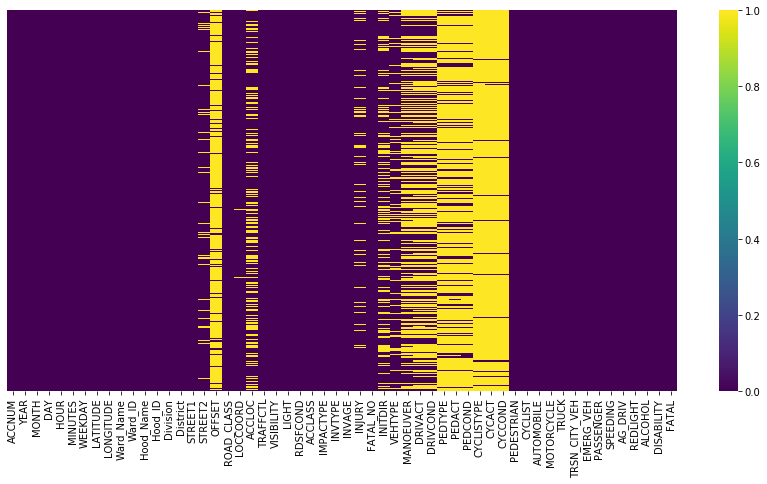

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(KSI_CLEAN.isnull(), yticklabels=False,cmap='viridis')

Lets try to understand that what causes of accidents resulted in Fatal incidents (involving 1 or more deaths).
To do the first lets get the unique values of fatal incidents in a seperate df and then do the analysis. 

In [7]:
KSI_CLEAN.shape

(12557, 56)

#### 1.2 Data cleaning by dropping columns with large amount of missing value from heat map

In [8]:
## Dropping columns where missing values were greater than 80%
KSI_CLEAN = KSI_CLEAN.drop(["PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE", "CYCACT", "CYCCOND", "OFFSET"], axis=1)
KSI_CLEAN.shape

(12557, 49)

In [9]:
KSI_CLEAN.ACCLASS.unique()

array(['Non-Fatal Injury', 'Fatal', 'Property Damage Only'], dtype=object)

In [10]:
KSI_CLEAN['ACCLASS'] = np.where(KSI_CLEAN['ACCLASS'] == 'Property Damage Only', 'Non-Fatal', KSI_CLEAN['ACCLASS'])
KSI_CLEAN['ACCLASS'] = np.where(KSI_CLEAN['ACCLASS'] == 'Non-Fatal Injury', 'Non-Fatal', KSI_CLEAN['ACCLASS'])
KSI_CLEAN.ACCLASS.unique()

array(['Non-Fatal', 'Fatal'], dtype=object)

In [11]:
# Verifying columns with object data type
print(KSI_CLEAN.select_dtypes(["object"]).columns)

Index(['Ward_Name', 'Hood_Name', 'Division', 'District', 'STREET1', 'STREET2',
       'ROAD_CLASS', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND'],
      dtype='object')


#### 1.3 Data cleaning by changing data type

In [12]:
##changing all object data types to category 
objdtype_cols = KSI_CLEAN.select_dtypes(["object"]).columns
KSI_CLEAN[objdtype_cols] = KSI_CLEAN[objdtype_cols].astype('category')

In [13]:
KSI_CLEAN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ACCNUM         12557 non-null  int64   
 1   YEAR           12557 non-null  int64   
 2   MONTH          12557 non-null  int64   
 3   DAY            12557 non-null  int64   
 4   HOUR           12557 non-null  int64   
 5   MINUTES        12557 non-null  int64   
 6   WEEKDAY        12557 non-null  int64   
 7   LATITUDE       12557 non-null  float64 
 8   LONGITUDE      12557 non-null  float64 
 9   Ward_Name      12557 non-null  category
 10  Ward_ID        12557 non-null  int64   
 11  Hood_Name      12557 non-null  category
 12  Hood_ID        12557 non-null  int64   
 13  Division       12557 non-null  category
 14  District       12556 non-null  category
 15  STREET1        12557 non-null  category
 16  STREET2        11493 non-null  category
 17  ROAD_CLASS     12557 non-null  

### 2.0 Data relationship exploration

#### 2.1 Accident numbers against month and year

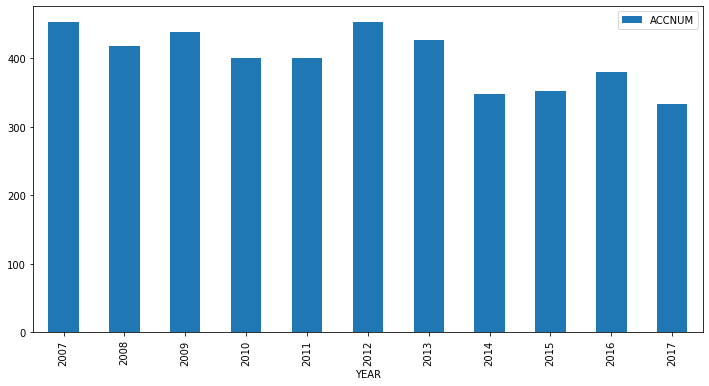

In [14]:
#Number of Unique accidents by Year
Num_accident = KSI_CLEAN.groupby('YEAR')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
Num_accident.plot(kind='bar', legend = True)
plt.show()
  

Total number of incidnets have reduced slightly over the years.

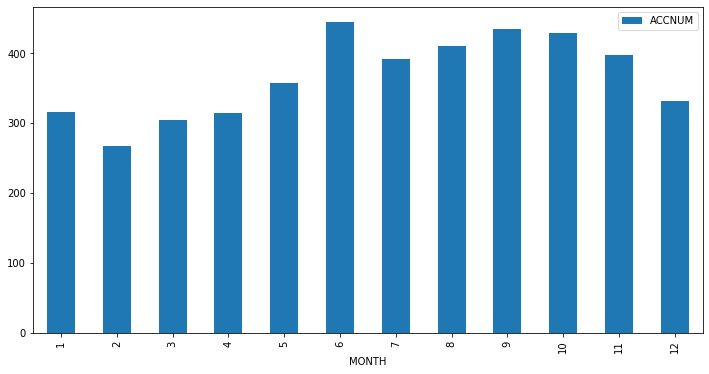

In [15]:
#Number of Unique accidents by Year
Num_accident = KSI_CLEAN.groupby('MONTH')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
Num_accident.plot(kind='bar', legend = True)
plt.show()
#Total number of incidnets have reduced slightly over the years.  

From the data above, accidents happened more from June to October

#### 2.2 Heat map of accidents

In [16]:
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn import tree, metrics
from scipy.stats import norm 
from scipy import stats, integrate
import matplotlib.pyplot as plt
from IPython.display import HTML
import folium
from folium.plugins import HeatMap
from math import sqrt

In [17]:
#Creating a Heatmap of where Fatality happened (Injury == Fatal)
KSI_Fatal = KSI_CLEAN[KSI_CLEAN['INJURY'] == 'Fatal']
KSI_Fatal = KSI_Fatal[['LATITUDE', 'LONGITUDE', 'FATAL']]
lat_Toronto = KSI_CLEAN.describe().at['mean','LATITUDE']
lng_Toronto = KSI_CLEAN.describe().at['mean','LONGITUDE']
#Fatal_map = folium.Map(location = [lat_Toronto, lng_Toronto], zoom_start=5)

Toronto_location = [43.6532, -79.3832]

Fatal_map = folium.Map(Toronto_location, zoom_start=5)
HeatMap(KSI_Fatal.values, min_opacity =0.3).add_to(Fatal_map)
Fatal_map

#### 2.3 ACCLASS VS Fatal VS injury --- looking for target column (FATAL)

ACCLASS is columns that classified into 3 catergory while fatal only show whether is fatal. 

1.In general column ACCLASS and FATAL both show same pattern. 

2.Injury miss a lot of information thus not very meaningful to be the target column

As Fatal column was already in int type and quite similar to ACCLASS, it will be used as output in data modeling later.

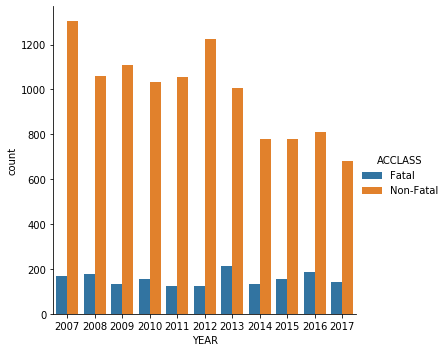

In [18]:
#Categorizing Fatal vs. non-Fatal Incident (non-unique i.e: one accident is counted depending upon involved parties)

sns.catplot(x='YEAR', kind='count', data=KSI_CLEAN,  hue='ACCLASS')

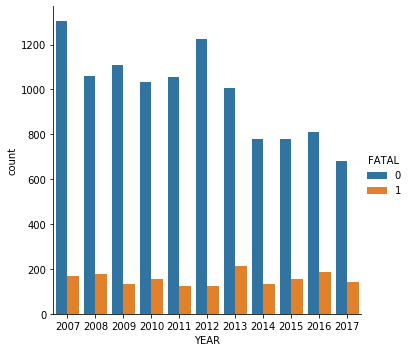

In [19]:
#Categorizing Fatal vs. non-Fatal Incident (non-unique i.e: one accident is counted depending upon involved parties)

sns.catplot(x='YEAR', kind='count', data=KSI_CLEAN,  hue='FATAL')

From 2007 to 2017, the numbers of non-fatal accident declined while those occurance of fatal accident kept unchanged.

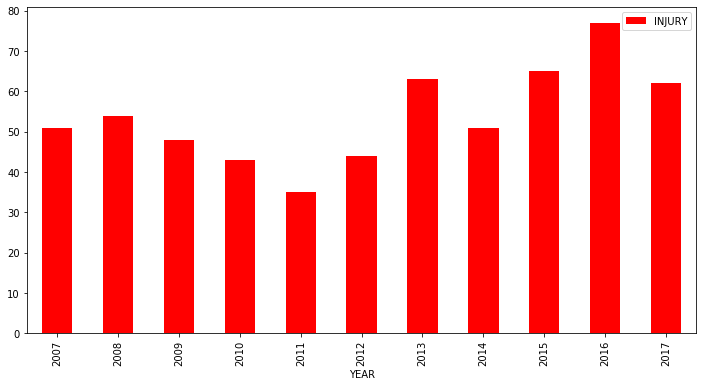

In [20]:
#Lets look at Fatality over years (# of people died)
Fatality = KSI_CLEAN[KSI_CLEAN['INJURY'] =='Fatal']
Fatality = Fatality.groupby(KSI_CLEAN['YEAR']).count()
plt.figure(figsize=(12,6))
Fatality['INJURY'].plot(kind='bar', legend = True,color='r')

plt.show()
#Fatility was highest in 2016 

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


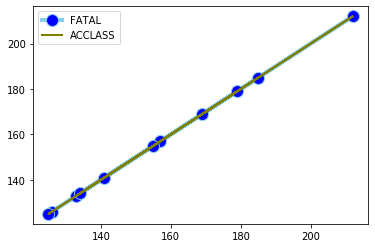

In [21]:

#Lets look at Fatality over years (# of people died)
Fatal = KSI_CLEAN[KSI_CLEAN['FATAL'] ==1]
Fatal = Fatal.groupby(KSI_CLEAN['YEAR']).count()
ACCFatal=KSI_CLEAN[KSI_CLEAN['ACCLASS'] =='Fatal']
ACCFatal = ACCFatal.groupby(KSI_CLEAN['YEAR']).count()
# multiple line plot
# multiple line plot
plt.plot( 'YEAR', 'FATAL', data=Fatal, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'YEAR', 'ACCLASS', data=ACCFatal, marker='', color='olive', linewidth=2)

plt.legend()

#### 2.4 Region vs District --- Toronto East York has the most accident numbers.

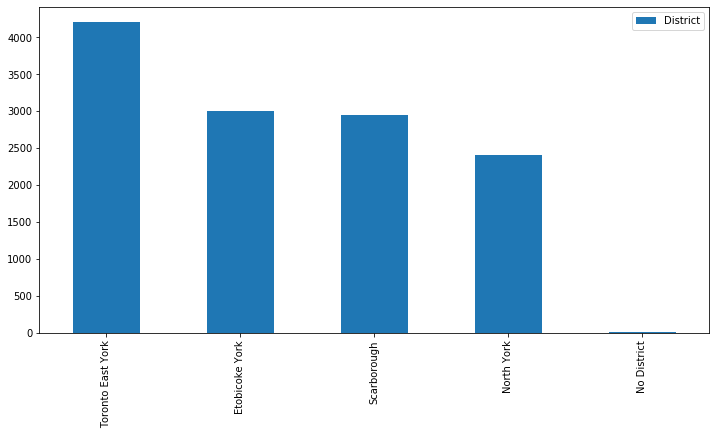

In [22]:
#Looking at area where accident happens
Region_KSI_CLEAN = KSI_CLEAN['District'].value_counts()
plt.figure(figsize=(12,6))
Region_KSI_CLEAN.plot(kind='bar', legend = True)
plt.show()

#### 2.5 Pivot table and pie chart for Summarison

Automobiles have been pretty consistent reason of accident over the years involving aggressive driving and pedestrians 

##### The columns in ksi_pivot can be classified into following categories:
    - Driving condition for accidents (AG_DRIV, ALCOHOL, DISABILITY, REDLIGHT, SPEEDING)
    - Type of vehicles involved (AUTOMOBILE, CYCLIST, EMERG_VEH, MOTORCYCLE, TRNS_CITY_VEH, TRUCK)

From KSI_pivot_cause, AG_DRIV (Aggressive and Distracted Driving) are the major cause of accidents (62.9%), speeding accounts for 21.4, redlight is 10.4% and alcohol is 5.3 %.

From KSI_pivot_Types, automobile is reponsible for 45.6 % accident while truck, motocycle,Transit or City Vehicle are all second to it.

From KSI_pivot_CPP, passengers and PEDESTRIAN are major victims (each 40~ %) and cyclist (12 %) are second to them.

From KSI_pivot_DF, Accidents caused 80~ % fatality.


Text(0.5, 0, 'Driving condition VS Accidents in Ontario in last 10 years(%age)')

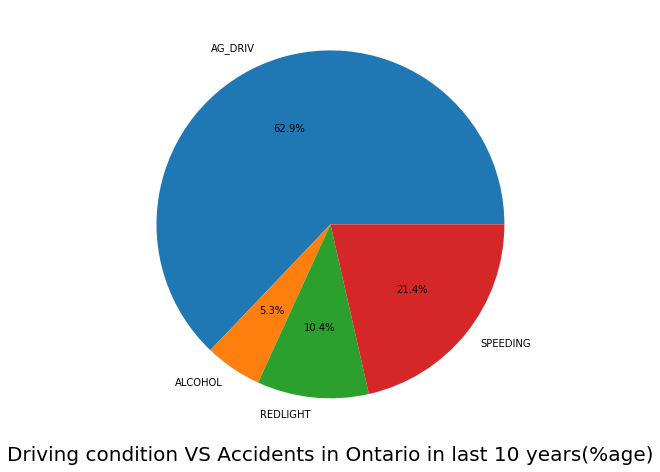

In [23]:
## Driving condition VS accident #
## creating a pivot table for accidents causing by 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL'  for EDA.
KSI_pivot_cause = KSI_CLEAN.pivot_table(index='YEAR', 
                           values = ['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL'],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(8,8))
KSI_pivot_cause.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Driving condition VS Accidents in Ontario in last 10 years(%age)',fontsize=20)

In [24]:
## creating a pivot table for accidents causing by 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL'  in 10 years
KSI_pivot_cause.drop('Total Under Category', axis=0, inplace=True)
fig, ax1 = plt.subplots(figsize=(12,5))
KSI_pivot_cause.plot(kind='bar', ax=ax1, xticks=KSI_pivot_cause.index)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000021B05A348C8> (for post_execute):


TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

<Figure size 864x360 with 1 Axes>

Text(0, 0.5, 'Accidents')

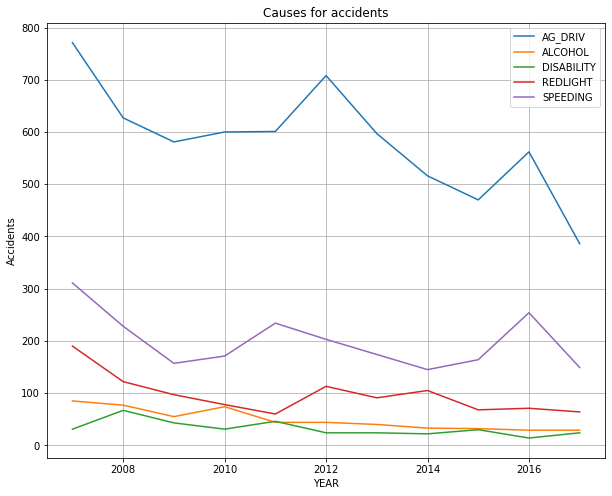

In [25]:
#Causes for Fatal in line graph
Cause_Fatal = KSI_CLEAN.pivot_table(index='YEAR', margins=False ,values=['ALCOHOL', 'AG_DRIV', 'SPEEDING','REDLIGHT','DISABILITY'],aggfunc=np.sum)
Cause_Fatal.plot(figsize=(10,8), title="Causes for accidents", grid=True)
plt.ylabel('Accidents')

Text(0.5, 0, 'Vechile type VS Accidents in Ontario in last 10 years(%age)')

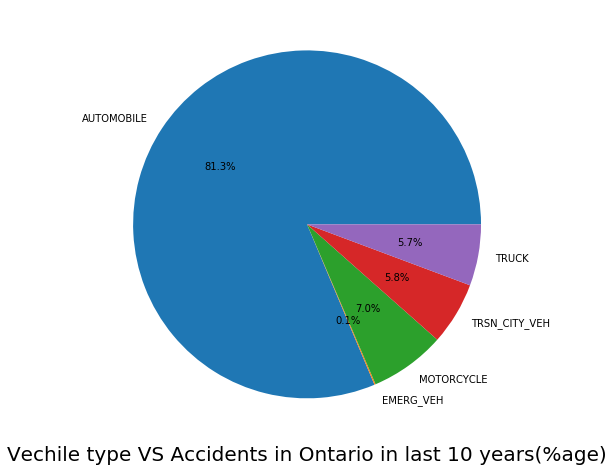

In [26]:
## vechile type VS accident #
## creating a pivot table for accidents causing by 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH'   in 10 years
KSI_pivot_Types = KSI_CLEAN.pivot_table(index='YEAR', 
                           values = [ 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH' ],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(8,8))
KSI_pivot_Types.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Vechile type VS Accidents in Ontario in last 10 years(%age)',fontsize=20)

In [27]:
KSI_pivot_Types.drop('Total Under Category', axis=0, inplace=True)
fig, ax1 = plt.subplots(figsize=(12,5))
KSI_pivot_Types.plot(kind='bar', ax=ax1, xticks=KSI_pivot_cause.index)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000021B05A348C8> (for post_execute):


TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

<Figure size 864x360 with 1 Axes>

Text(0, 0.5, 'Vehicles')

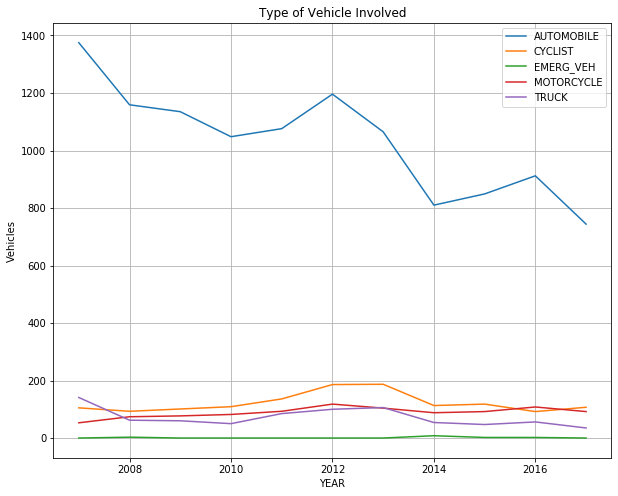

In [28]:
#Type of vehicles involved
Veh_involved = KSI_CLEAN.pivot_table(index='YEAR',values=['AUTOMOBILE', 'CYCLIST', 'EMERG_VEH', 'MOTORCYCLE', 'TRUCK'],aggfunc=np.sum)
Veh_involved.plot(figsize=(10,8), title="Type of Vehicle Involved", grid=True)
plt.ylabel('Vehicles')

Text(0.5, 0, 'Victims VS Accidents in Ontario in last 10 years(%age)')

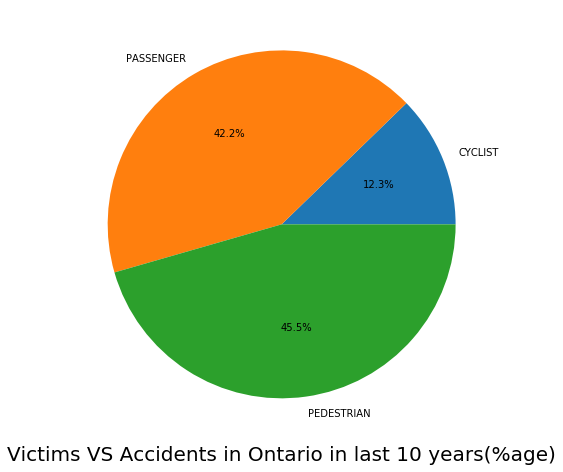

In [29]:
## Victims VS accident #
## creating a pivot table for Victims by 'CYCLIST','PEDESTRIAN','PASSENGER' 
KSI_pivot_CPP = KSI_CLEAN.pivot_table(index='YEAR', 
                           values = [ 'CYCLIST','PEDESTRIAN','PASSENGER' ],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(8,8))
KSI_pivot_CPP.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Victims VS Accidents in Ontario in last 10 years(%age)',fontsize=20)

Text(0.5, 0, 'Total Accidents in Ontario in last 10 years(%age)')

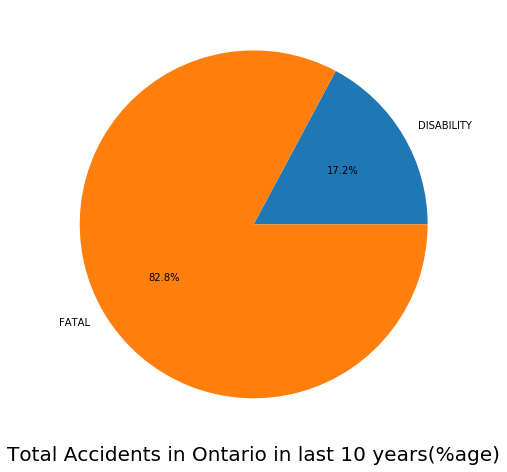

In [30]:
## Fatal and Disability VS accident #
## creating a pivot table for 'FATAL','DISABILITY' against accidents #
KSI_pivot_DF = KSI_CLEAN.pivot_table(index='YEAR', 
                           values = [ 'FATAL','DISABILITY' ],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(8,8))
KSI_pivot_DF.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Total Accidents in Ontario in last 10 years(%age)',fontsize=20)

In [31]:
## creating a pivot table for 'FATAL','DISABILITY' against accidents # in 10 years
KSI_pivot_DF.drop('Total Under Category', axis=0, inplace=True)
fig, ax1 = plt.subplots(figsize=(12,5))
KSI_pivot_DF.plot(kind='bar', ax=ax1, xticks=KSI_pivot_cause.index)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000021B05A348C8> (for post_execute):


TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

<Figure size 864x360 with 1 Axes>

In [32]:
data = KSI_CLEAN.groupby(by=['YEAR', 'MONTH'],as_index=False).sum()
data = data.pivot('MONTH','YEAR','FATAL')
data

YEAR,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
MONTH,,,,,,,,,,,
1,3,15,4,28,11,14,10,6,5,22,12
2,14,16,5,16,3,3,6,8,8,12,6
3,19,6,13,11,6,2,15,1,16,12,14
4,13,7,10,4,2,12,18,2,9,16,12
5,2,30,8,10,0,12,9,12,16,17,12
6,25,16,11,9,8,4,4,3,16,16,8
7,23,28,8,28,16,15,35,14,9,21,14
8,16,10,6,3,37,11,39,24,14,15,11
9,23,13,11,17,12,13,21,10,27,14,18


plt.figure(figsize=(12,6))
sns.heatmap(data)
plt.show()

### 3.0 Data Modeling

#### 3.1 Data preparation for modeling by checking null value, get dummies


In [33]:
KSI_CLEAN.shape

(12557, 49)

In [34]:
KSI_CLEAN.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID',
       'Division', 'District', 'STREET1', 'STREET2', 'ROAD_CLASS', 'LOCCOORD',
       'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'FATAL'],
      dtype='object')

In [35]:
KSI_CLEAN.dtypes

ACCNUM              int64
YEAR                int64
MONTH               int64
DAY                 int64
HOUR                int64
MINUTES             int64
WEEKDAY             int64
LATITUDE          float64
LONGITUDE         float64
Ward_Name        category
Ward_ID             int64
Hood_Name        category
Hood_ID             int64
Division         category
District         category
STREET1          category
STREET2          category
ROAD_CLASS       category
LOCCOORD         category
ACCLOC           category
TRAFFCTL         category
VISIBILITY       category
LIGHT            category
RDSFCOND         category
ACCLASS          category
IMPACTYPE        category
INVTYPE          category
INVAGE           category
INJURY           category
FATAL_NO            int64
INITDIR          category
VEHTYPE          category
MANOEUVER        category
DRIVACT          category
DRIVCOND         category
PEDESTRIAN          int64
CYCLIST             int64
AUTOMOBILE          int64
MOTORCYCLE  

In [36]:
KSI_CLEAN_data=KSI_CLEAN[['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE',  'Hood_ID',
        'District',  
         'VISIBILITY', 'LIGHT', 'RDSFCOND', 
        'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']]

In [37]:
KSI_CLEAN_data.dtypes

ACCNUM              int64
YEAR                int64
MONTH               int64
DAY                 int64
HOUR                int64
MINUTES             int64
WEEKDAY             int64
LATITUDE          float64
LONGITUDE         float64
Hood_ID             int64
District         category
VISIBILITY       category
LIGHT            category
RDSFCOND         category
PEDESTRIAN          int64
CYCLIST             int64
AUTOMOBILE          int64
MOTORCYCLE          int64
TRUCK               int64
TRSN_CITY_VEH       int64
EMERG_VEH           int64
PASSENGER           int64
SPEEDING            int64
AG_DRIV             int64
REDLIGHT            int64
ALCOHOL             int64
DISABILITY          int64
dtype: object

Here is the list of dropping columns: 'ACCLOC', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID',
       'Division', 'STREET1', 'STREET2', 'ROAD_CLASS', 'LOCCOOR','TRAFFCTL',
       'ACCLOC',  'RDSFCOND', 'ACCLASS','IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND'
       'ACCLASS',

Reason:overlapping or missing value or not related
       

In [38]:
KSI_CLEAN_data['LATITUDE']=KSI_CLEAN_data['LATITUDE'].astype('int')
KSI_CLEAN_data['LONGITUDE']=KSI_CLEAN_data['LATITUDE'].astype('int')

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
print("Percentage of missing values in the KSI_CLEAN_data dataset")
KSI_CLEAN_data.isna().sum()/len(KSI_CLEAN_data)*100

Percentage of missing values in the KSI_CLEAN_data dataset


ACCNUM           0.000000
YEAR             0.000000
MONTH            0.000000
DAY              0.000000
HOUR             0.000000
MINUTES          0.000000
WEEKDAY          0.000000
LATITUDE         0.000000
LONGITUDE        0.000000
Hood_ID          0.000000
District         0.007964
VISIBILITY       0.015927
LIGHT            0.015927
RDSFCOND         0.055746
PEDESTRIAN       0.000000
CYCLIST          0.000000
AUTOMOBILE       0.000000
MOTORCYCLE       0.000000
TRUCK            0.000000
TRSN_CITY_VEH    0.000000
EMERG_VEH        0.000000
PASSENGER        0.000000
SPEEDING         0.000000
AG_DRIV          0.000000
REDLIGHT         0.000000
ALCOHOL          0.000000
DISABILITY       0.000000
dtype: float64

District         category

TRAFFCTL         category
VISIBILITY       category
LIGHT            category
RDSFCOND         category
ACCLASS          category

In [40]:
KSI_CLEAN_data['District'].unique()

['Toronto East York', 'Scarborough', 'Etobicoke York', 'North York', NaN, 'No District']
Categories (5, object): ['Etobicoke York', 'No District', 'North York', 'Scarborough', 'Toronto East York']

In [41]:
KSI_CLEAN_data['VISIBILITY'].unique()

['Clear', 'Rain', 'Freezing Rain', 'Snow', 'Other', 'Fog, Mist, Smoke, Dust', 'Drifting Snow', 'Strong wind', NaN]
Categories (8, object): ['Clear', 'Drifting Snow', 'Fog, Mist, Smoke, Dust', 'Freezing Rain', 'Other', 'Rain', 'Snow', 'Strong wind']

In [42]:
KSI_CLEAN_data['LIGHT'].unique()

['Dark', 'Dark, artificial', 'Dusk, artificial', 'Daylight', 'Daylight, artificial', 'Dusk', 'Dawn, artificial', NaN, 'Dawn', 'Other']
Categories (9, object): ['Dark', 'Dark, artificial', 'Dawn', 'Dawn, artificial', ..., 'Daylight, artificial', 'Dusk', 'Dusk, artificial', 'Other']

In [43]:
KSI_CLEAN_data['RDSFCOND'].unique()

['Dry', 'Wet', 'Slush', 'Loose Snow', NaN, 'Packed Snow', 'Other', 'Loose Sand or Gravel', 'Ice', 'Spilled liquid']
Categories (9, object): ['Dry', 'Ice', 'Loose Sand or Gravel', 'Loose Snow', ..., 'Packed Snow', 'Slush', 'Spilled liquid', 'Wet']

In [44]:

KSI_CLEAN_data = pd.get_dummies(KSI_CLEAN_data, columns=['VISIBILITY','RDSFCOND','LIGHT','District'])

In [45]:
KSI_CLEAN_data.shape

(12557, 54)

In [46]:

KSI_CLEAN_target=KSI_CLEAN[[ 'FATAL']]
KSI_CLEAN_data.dtypes

ACCNUM                               int64
YEAR                                 int64
MONTH                                int64
DAY                                  int64
HOUR                                 int64
MINUTES                              int64
WEEKDAY                              int64
LATITUDE                             int32
LONGITUDE                            int32
Hood_ID                              int64
PEDESTRIAN                           int64
CYCLIST                              int64
AUTOMOBILE                           int64
MOTORCYCLE                           int64
TRUCK                                int64
TRSN_CITY_VEH                        int64
EMERG_VEH                            int64
PASSENGER                            int64
SPEEDING                             int64
AG_DRIV                              int64
REDLIGHT                             int64
ALCOHOL                              int64
DISABILITY                           int64
VISIBILITY_

#### 3.2 Cluster analysis

##### 3.2.1 Elbow Method to Determine Number of Clusters

To begin with Cluster analysis, Elbow method was explored to identify optimized cluster number using 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL','DISABILITY' as input and aggregate those numbers as output to further investigate and identify which neibourhood has highest numbers of accident related to input condition.

Elbow method revealed the optimal cluster to be 4 clusters.



In [47]:
drop_colmns = ['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_ID',
       'Division',  'STREET1', 'STREET2', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',  'PEDESTRIAN',
       'CYCLIST', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'AUTOMOBILE']
df1 = KSI_CLEAN.drop(columns=drop_colmns)

In [48]:
df1_g2=df1.groupby(['Hood_Name','SPEEDING']).size().to_frame('count').reset_index()
df1speed = df1_g2.pivot(index='Hood_Name',columns='SPEEDING',values='count')
df1_g2=df1.groupby(['Hood_Name','AG_DRIV']).size().to_frame('count').reset_index()
df1agdriv = df1_g2.pivot(index='Hood_Name',columns='AG_DRIV',values='count')
df1_g2=df1.groupby(['Hood_Name','REDLIGHT']).size().to_frame('count').reset_index()
df1red = df1_g2.pivot(index='Hood_Name',columns='REDLIGHT',values='count')
df1_g2=df1.groupby(['Hood_Name','ALCOHOL']).size().to_frame('count').reset_index()
df1alco = df1_g2.pivot(index='Hood_Name',columns='ALCOHOL',values='count')
df1_g2=df1.groupby(['Hood_Name','DISABILITY']).size().to_frame('count').reset_index()
df1disb = df1_g2.pivot(index='Hood_Name',columns='DISABILITY',values='count')
df1speed = df1speed.drop(df1speed.columns[0], axis=1)
df1speed[2] = df1agdriv.drop(df1agdriv.columns[0], axis=1)
df1speed[3] = df1red.drop(df1red.columns[0], axis=1)
df1speed[4] = df1alco.drop(df1alco.columns[0], axis=1)
df1speed[5] = df1disb.drop(df1alco.columns[0], axis=1)
df1speed.columns.names = ['Cause'] 
df1 = df1speed
df1 = df1.dropna()
df1.columns = ['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL','DISABILITY']

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

In [50]:
scaler = StandardScaler()
Sum_of_squared_distances = []
std_scale = scaler.fit(df1)
df_transformed = std_scale.transform(df1)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed)
X = pca.transform(df_transformed)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

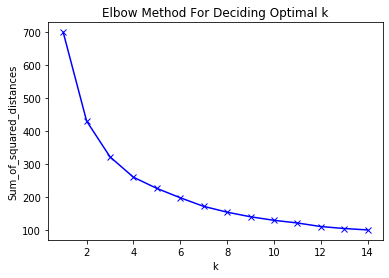

In [51]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Deciding Optimal k')
plt.show()

##### 3.2.2 Cluster analysis using Kmeans in general

In this section, Kmean was applied to all other column besides those mentioned above. But using district instead of hoodname.

In [52]:
# import KMeans
from sklearn.cluster import KMeans

In [53]:
KSI_CLEAN_data_cluster=KSI_CLEAN[['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
        'Hood_ID',
        'District',  
         'VISIBILITY', 'LIGHT', 'RDSFCOND', 
        'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY','FATAL']]

In [54]:


KSI_CLEAN_data_cluster= pd.get_dummies(KSI_CLEAN_data_cluster, columns=['VISIBILITY','RDSFCOND','LIGHT','District'])

In [55]:
KSI_CLEAN_data_cluster.shape

(12557, 53)

In [56]:
# create kmeans object
kmeans = KMeans(n_clusters=4)
# fit kmeans object to data
kmeans.fit(KSI_CLEAN_data_cluster)
# print location of clusters learned by kmeans object
cluster_center=pd.DataFrame(kmeans.cluster_centers_,columns=KSI_CLEAN_data_cluster.columns)
print(cluster_center)
# save new clusters for chart
y_km = kmeans.fit_predict(KSI_CLEAN_data_cluster)

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

         ACCNUM         YEAR     MONTH        DAY       HOUR    MINUTES  \
0  3.831613e+09  2013.934043  7.102128  15.843617  13.669149  28.435106   
1  4.753054e+06  2009.953556  6.695311  15.481826  13.029616  28.333408   
2  6.454937e+09  2016.453693  6.674752  16.049614  13.499449  27.777288   
3  5.001276e+09  2015.000000  7.326209  16.264342  13.339708  28.130484   

    WEEKDAY    Hood_ID  PEDESTRIAN   CYCLIST  ...  LIGHT_Daylight  \
0  3.222340  72.217021    0.374468  0.126596  ...        0.535106   
1  2.935046  73.656047    0.400269  0.102423  ...        0.601189   
2  3.028115  73.830209    0.412900  0.109702  ...        0.574421   
3  3.176603  74.271091    0.372328  0.130484  ...        0.533183   

   LIGHT_Daylight, artificial  LIGHT_Dusk  LIGHT_Dusk, artificial  \
0                    0.004255    0.019149                0.018085   
1                    0.002692    0.016715                0.007404   
2                    0.020948    0.007718                0.015436   
3 

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_iter=max_iter, verbose=verbose)
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

In [57]:
cluster_center.describe()

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,Hood_ID,PEDESTRIAN,CYCLIST,...,LIGHT_Daylight,"LIGHT_Daylight, artificial",LIGHT_Dusk,"LIGHT_Dusk, artificial",LIGHT_Other,District_Etobicoke York,District_No District,District_North York,District_Scarborough,District_Toronto East York
count,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000
mean,3.823145e+09,2013.835323,6.949600,15.909850,13.384480,28.169071,3.090526,73.493592,0.389991,0.117301,...,0.560975,0.007536,0.012020,0.013606,5.609154e-05,0.236757,2.029977e-03,0.208494,0.242400,0.310182
std,2.762517e+09,2.786288,0.319011,0.333061,0.272144,0.290267,0.132732,0.889539,0.019861,0.013407,...,0.032861,0.008982,0.007022,0.004542,1.121831e-04,0.016980,3.625134e-03,0.024032,0.010693,0.029778
min,4.753054e+06,2009.953556,6.674752,15.481826,13.029616,27.777288,2.935046,72.217021,0.372328,0.102423,...,0.533183,0.002250,0.004499,0.007404,1.626303e-18,0.222722,-4.011548e-17,0.178595,0.228741,0.280851
25%,2.874898e+09,2012.938921,6.690171,15.753169,13.262185,28.042185,3.004847,73.296290,0.373933,0.107883,...,0.534626,0.002582,0.006913,0.011975,1.646632e-18,0.223542,-3.361027e-18,0.194649,0.236882,0.292236
50%,4.416445e+09,2014.467021,6.898719,15.946616,13.419578,28.231946,3.102359,73.743128,0.387369,0.118149,...,0.554764,0.003474,0.012217,0.014467,1.802486e-18,0.232897,3.365492e-04,0.211924,0.243833,0.304933
75%,5.364691e+09,2015.363423,7.158148,16.103296,13.541874,28.358833,3.188037,73.940430,0.403427,0.127568,...,0.581113,0.008429,0.017324,0.016098,5.609154e-05,0.246112,2.366526e-03,0.225768,0.249351,0.322880
max,6.454937e+09,2016.453693,7.326209,16.264342,13.669149,28.435106,3.222340,74.271091,0.412900,0.130484,...,0.601189,0.020948,0.019149,0.018085,2.243662e-04,0.258511,7.446809e-03,0.231533,0.253191,0.350011


##### 3.2.3 Cluster analysis using Kmeans checking neighborhood using raw data with selected columns

Here 'SPEEDING' and 'AG_DRIV' were selected as for investigation of Neighborhood

1. It is Concluded that the Highest number of accidents causing fatalities by speeding and aggressive driving in Toronto District from 2007-2017, based on Kmeans, was occurred more in['Toronto East York']


2. when hoodname was chozen as input,  'South Parkdale (85)' 'West Humber-Clairville (1)' and 'Wexford/Maryvale (119)' rank top 3 out of all hoods as highest numbers of accidents that related to speeding and aggressive driving based on cluster that labeled as 2 and its relative pivot table for speeding and aggressive fatal numbers.

From cluster that labeled as 0 and its relative pivot table for speeding and aggressive fatal numbers,  'Elms-Old Rexdale (5)', 'Kingsway South (15)','Broadview North (57)', 'Church-Yonge Corridor (75)','Englemount-Lawrence (32)', 'Highland Creek (134)','Hillcrest Village (48)', 'Lansing-Westgate (38)','O'Connor-Parkview (54)', 'Oakwood Village (107)' are the least accidents reported among all regions.


In [58]:
drop_colmns = ['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_ID',
       'Division', 'Hood_Name', 'STREET1', 'STREET2', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',  'PEDESTRIAN',
       'CYCLIST', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'AUTOMOBILE']
dk_dropped = KSI_CLEAN.drop(columns=drop_colmns)
dk = dk_dropped[dk_dropped['FATAL']==1]
dk.columns

Index(['District', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'FATAL'],
      dtype='object')

In [59]:
dk_g2=dk.groupby(['District','SPEEDING']).size().to_frame('count').reset_index()
dkspeed = dk_g2.pivot(index='District',columns='SPEEDING',values='count')
dk_g2=dk.groupby(['District','AG_DRIV']).size().to_frame('count').reset_index()
dkagdriv = dk_g2.pivot(index='District',columns='AG_DRIV',values='count')
dk_g2=dk.groupby(['District','REDLIGHT']).size().to_frame('count').reset_index()
dfred = dk_g2.pivot(index='District',columns='REDLIGHT',values='count')
dk_g2=dk.groupby(['District','ALCOHOL']).size().to_frame('count').reset_index()
dkalco = dk_g2.pivot(index='District',columns='ALCOHOL',values='count')
dk_g2=dk.groupby(['District','DISABILITY']).size().to_frame('count').reset_index()
dkdisb = dk_g2.pivot(index='District',columns='DISABILITY',values='count')
dknew = dkspeed
dknew.columns.names = ['Cause'] 
dknew = dknew.dropna()
dknew.columns = ['SPEEDING', 'AG_DRIV']
dknew.nlargest(10,'SPEEDING')


,SPEEDING,AG_DRIV
District,,
Scarborough,387,116
Toronto East York,374,77
North York,271,111
Etobicoke York,270,109
No District,0,0


In [60]:
dk_g2=dk.groupby(['District','SPEEDING']).size().to_frame('count').reset_index()
dk_g2

,District,SPEEDING,count
0,Etobicoke York,0,270
1,Etobicoke York,1,109
2,No District,0,0
3,No District,1,0
4,North York,0,271
5,North York,1,111
6,Scarborough,0,387
7,Scarborough,1,116
8,Toronto East York,0,374
9,Toronto East York,1,77


Index([0, 1, 'label'], dtype='object')


C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

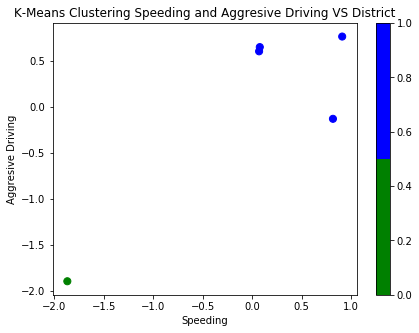

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

scaler = StandardScaler()
Sum_of_squared_distances = []
std_scale = scaler.fit(dknew)
dk_transformed = std_scale.transform(dknew)
from sklearn.cluster import KMeans
kmeansk = KMeans(n_clusters=2,random_state=3425)
colors = ['green','blue']


plt.figure(figsize=(15, 5)) 

ax = plt.subplot(121)
kc =kmeansk.fit(dk_transformed)
label = pd.DataFrame(kc.labels_)
dk_result =pd.DataFrame(dk_transformed)
# label = label.sort_values(by=0)
dk_result['label']=label
print(dk_result.columns)
scatterd = plt.scatter(dk_result[0],dk_result[1],
                     c=list(label.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Speeding and Aggresive Driving VS District')
plt.xlabel('Speeding')
plt.ylabel('Aggresive Driving')
plt.colorbar(scatterd)

In [62]:
print('We Conclude that the Highest number of accidents causing fatalitiesby speeding and aggresive driving in Toronto District from 2007-2017, based on Kmeans, occured in')
neighborhoodsk = dknew.index
neighborhoodsk = np.array(neighborhoodsk)
print(neighborhoodsk[np.where(label[0]==1)])
#kdsafe = neighborhoodsk[np.where(label[0]==1)]
#kdaccident = neighborhoodsk[np.where(label[0]==0)]

We Conclude that the Highest number of accidents causing fatalitiesby speeding and aggresive driving in Toronto District from 2007-2017, based on Kmeans, occured in
['Etobicoke York' 'North York' 'Scarborough' 'Toronto East York']


In [63]:
ClusterLabelk=pd.DataFrame(kmeansk.labels_) 
ClusterLabelk['label']=dknew.index
ClusterLabelk

,0,label
0,1,Etobicoke York
1,0,No District
2,1,North York
3,1,Scarborough
4,1,Toronto East York


In [64]:
drop_colmns = ['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_ID',
       'Division',  'STREET1', 'STREET2', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',  'PEDESTRIAN',
       'CYCLIST', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'AUTOMOBILE']
df_dropped = KSI_CLEAN.drop(columns=drop_colmns)
df = df_dropped[df_dropped['FATAL']==1]
df.columns

Index(['Hood_Name', 'District', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'FATAL'],
      dtype='object')

In [65]:
df_g2=df.groupby(['Hood_Name','SPEEDING']).size().to_frame('count').reset_index()
dfspeed = df_g2.pivot(index='Hood_Name',columns='SPEEDING',values='count')
df_g2=df.groupby(['Hood_Name','AG_DRIV']).size().to_frame('count').reset_index()
dfagdriv = df_g2.pivot(index='Hood_Name',columns='AG_DRIV',values='count')
df_g2=df.groupby(['Hood_Name','REDLIGHT']).size().to_frame('count').reset_index()
dfred = df_g2.pivot(index='Hood_Name',columns='REDLIGHT',values='count')
df_g2=df.groupby(['Hood_Name','ALCOHOL']).size().to_frame('count').reset_index()
dfalco = df_g2.pivot(index='Hood_Name',columns='ALCOHOL',values='count')
df_g2=df.groupby(['Hood_Name','DISABILITY']).size().to_frame('count').reset_index()
dfdisb = df_g2.pivot(index='Hood_Name',columns='DISABILITY',values='count')
dfnew = dfspeed
#dfnew[1] = dfagdriv

In [66]:
dfnew.columns.names = ['Cause'] 
dfnew = dfnew.dropna()
dfnew.columns = ['SPEEDING', 'AG_DRIV']
dfnew.nlargest(10,'SPEEDING')

,SPEEDING,AG_DRIV
Hood_Name,,
South Parkdale (85),50,8
Wexford/Maryvale (119),50,0
West Humber-Clairville (1),47,28
Bendale (127),32,5
Waterfront Communities-The Island (77),30,21
Kensington-Chinatown (78),28,0
Clairlea-Birchmount (120),26,12
L'Amoreaux (117),26,0
Clanton Park (33),21,0


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

scaler = StandardScaler()
Sum_of_squared_distances = []
std_scale = scaler.fit(dfnew)
df_transformed = std_scale.transform(dfnew)

Index([0, 1, 'label'], dtype='object')


C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shanh\A

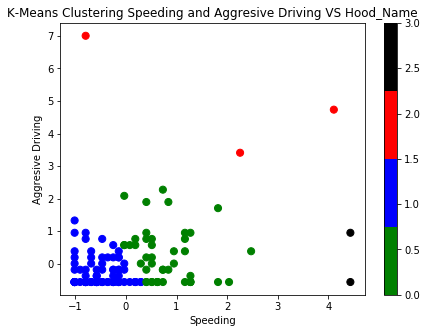

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=3425)
colors =  ['green','blue','red','black']


plt.figure(figsize=(15, 5)) 

ax = plt.subplot(121)
kc =kmeans.fit(df_transformed)
label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed)
# label = label.sort_values(by=0)
df_result['label']=label
print(df_result.columns)
scatter = plt.scatter(df_result[0],df_result[1],
                     c=list(label.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Speeding and Aggresive Driving VS Hood_Name')
plt.xlabel('Speeding')
plt.ylabel('Aggresive Driving')
plt.colorbar(scatter)


In [69]:
ClusterLabelh=pd.DataFrame(kmeans.labels_) 
ClusterLabelh['label']=dfnew.index
ClusterLabelh.head(5)

,0,label
0,1,Agincourt North (129)
1,0,Agincourt South-Malvern West (128)
2,1,Alderwood (20)
3,1,Annex (95)
4,0,Banbury-Don Mills (42)


Looking at cluster that labeled as 2 and its relative pivot table for speeding and aggressive fatal numbers,  'South Parkdale (85)' 'West Humber-Clairville (1)' and 'Wexford/Maryvale (119)' rank top 3 out of all hoods.

In [70]:
print('We Conclude that the Highest number of accidents causing fatalities in Toronto Neighborhoods from 2007-2017, based on Kmeans, occured in')
neighborhoods = dfnew.index
neighborhoods = np.array(neighborhoods)
print(neighborhoods[np.where(label[0]==2)])
#ksafe = neighborhoods[np.where(label[0]==1)]
#kaccident = neighborhoods[np.where(label[0]==0)]

We Conclude that the Highest number of accidents causing fatalities in Toronto Neighborhoods from 2007-2017, based on Kmeans, occured in
['Victoria Village (43)' 'Waterfront Communities-The Island (77)'
 'West Humber-Clairville (1)']


In [71]:
dfnew.nlargest(3,'SPEEDING')

,SPEEDING,AG_DRIV
Hood_Name,,
South Parkdale (85),50,8
Wexford/Maryvale (119),50,0
West Humber-Clairville (1),47,28


Looking at cluster that labeled as 2 and its relative pivot table for speeding and aggressive fatal numbers,  'Elms-Old Rexdale (5)', 'Kingsway South (15)','Broadview North (57)', 'Church-Yonge Corridor (75)','Englemount-Lawrence (32)', 'Highland Creek (134)','Hillcrest Village (48)', 'Lansing-Westgate (38)','O'Connor-Parkview (54)', 'Oakwood Village (107)' are the least accidents reported among all regions and are in cluster 0.

In [72]:
print('We Conclude that the Highest number of accidents causing fatalities in Toronto Neighborhoods from 2007-2017, based on Kmeans, occured in')
neighborhoods = dfnew.index
neighborhoods = np.array(neighborhoods)
print(neighborhoods[np.where(label[0]==0)])
#ksafe = neighborhoods[np.where(label[0]==1)]
#kaccident = neighborhoods[np.where(label[0]==0)]

We Conclude that the Highest number of accidents causing fatalities in Toronto Neighborhoods from 2007-2017, based on Kmeans, occured in
['Agincourt South-Malvern West (128)' 'Banbury-Don Mills (42)'
 'Bay Street Corridor (76)' 'Bedford Park-Nortown (39)' 'Bendale (127)'
 'Birchcliffe-Cliffside (122)' 'Cabbagetown-South St.James Town (71)'
 'Clairlea-Birchmount (120)' 'Clanton Park (33)' 'Cliffcrest (123)'
 'Don Valley Village (47)' 'Dorset Park (126)' 'Downsview-Roding-CFB (26)'
 'Eglinton East (138)' 'Glenfield-Jane Heights (25)'
 'Humber Heights-Westmount (8)' 'Humber Summit (21)' 'Humbermede (22)'
 'Islington-City Centre West (14)' 'Kennedy Park (124)'
 'Kensington-Chinatown (78)' "L'Amoreaux (117)"
 'Lawrence Park South (103)' 'Malvern (132)' 'Milliken (130)'
 'Moss Park (73)' 'Newtonbrook East (50)' 'Newtonbrook West (36)'
 'North Riverdale (68)' 'Rexdale-Kipling (4)' 'Rockcliffe-Smythe (111)'
 'Roncesvalles (86)' 'Rosedale-Moore Park (98)' 'Rouge (131)'
 'Scarborough Village (13

In [73]:
dfnew.nsmallest(10,'SPEEDING')

,SPEEDING,AG_DRIV
Hood_Name,,
Bayview Woods-Steeles (49),0,2
Beechborough-Greenbrook (112),0,0
Blake-Jones (69),0,0
Danforth (66),0,0
East End-Danforth (62),0,0
Etobicoke West Mall (13),0,0
Forest Hill North (102),0,4
Lambton Baby Point (114),0,0
Mount Pleasant West (104),0,0


In [74]:
dfnew.nsmallest(10,'SPEEDING').index

CategoricalIndex(['Bayview Woods-Steeles (49)',
                  'Beechborough-Greenbrook (112)', 'Blake-Jones (69)',
                  'Danforth (66)', 'East End-Danforth (62)',
                  'Etobicoke West Mall (13)', 'Forest Hill North (102)',
                  'Lambton Baby Point (114)', 'Mount Pleasant West (104)',
                  'Niagara (82)'],
                 categories=['Agincourt North (129)', 'Agincourt South-Malvern West (128)', 'Alderwood (20)', 'Annex (95)', 'Banbury-Don Mills (42)', 'Bathurst Manor (34)', 'Bay Street Corridor (76)', 'Bayview Village (52)', ...], ordered=False, dtype='category', name='Hood_Name')

##### 3.2.4 Cluster analysis using hierarchical clustering libraries

In [75]:
KSI_CLEAN.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID',
       'Division', 'District', 'STREET1', 'STREET2', 'ROAD_CLASS', 'LOCCOORD',
       'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'FATAL'],
      dtype='object')

In [76]:
KSI_CLEAN_data_clusterHieCluster=KSI_CLEAN[['FATAL','YEAR', 'MONTH', 'DAY','Hood_Name',
                                            'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL','VISIBILITY', 'LIGHT', 'RDSFCOND']]

KSI_CLEAN_data_clusterHieCluster = pd.get_dummies(KSI_CLEAN_data_clusterHieCluster, columns=['VISIBILITY','RDSFCOND','LIGHT','Hood_Name'])

In [77]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

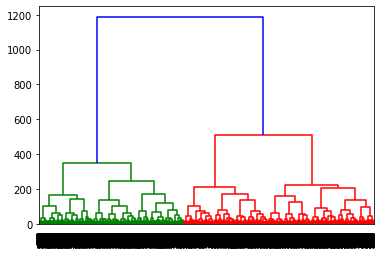

In [78]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(KSI_CLEAN_data_clusterHieCluster, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hcm = hc.fit_predict(KSI_CLEAN_data_clusterHieCluster )

plt.figure(figsize=(10, 7))
plt.scatter(KSI_CLEAN_data_clusterHieCluster[:,0], KSI_CLEAN_data_clusterHieCluster[:,1], c=cluster.labels_, cmap='rainbow')

plt.figure(figsize=(10, 7))
plt.scatter(KSI_CLEAN_data_clusterHieCluster[:,0], KSI_CLEAN_data_clusterHieCluster[:,1], c=cluster.labels_, cmap='rainbow')

#### 3.3 Feature selection

##### 3.3.1 Feature selection using P value

From P value, MONTH,DAY,Visbility, EMERG_VEH,HoodID,AUTOMOBILE,CYCLIST are over 0.05 that can be dropped for modelling. 40 columns were selected('ACCNUM', 'YEAR', 'HOUR', 'MINUTES', 'WEEKDAY', 'LATITUDE', 'LONGITUDE',
       'PEDESTRIAN', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'RDSFCOND_Dry', 'RDSFCOND_Ice', 'RDSFCOND_Loose Sand or Gravel',
       'RDSFCOND_Loose Snow', 'RDSFCOND_Other', 'RDSFCOND_Packed Snow',
       'RDSFCOND_Slush', 'RDSFCOND_Spilled liquid', 'RDSFCOND_Wet',
       'LIGHT_Dark', 'LIGHT_Dark, artificial', 'LIGHT_Dawn',
       'LIGHT_Dawn, artificial', 'LIGHT_Daylight',
       'LIGHT_Daylight, artificial', 'LIGHT_Dusk', 'LIGHT_Dusk, artificial',
       'LIGHT_Other', 'District_Etobicoke York', 'District_No District',
       'District_North York', 'District_Scarborough',
       'District_Toronto East York').

In [82]:
#pip uninstall pandas
!pip install pandas==0.24

  Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\shanh\\appdata\\local\\continuum\\anaconda3\\lib\\site-packages\\~andas\\_libs\\algos.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [83]:
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(KSI_CLEAN_data)
#Fitting sm.OLS model
model = sm.OLS(KSI_CLEAN_target,X_1).fit()
model.pvalues
model.pvalues>0.05

AttributeError: module 'pandas' has no attribute 'Panel'

In [ ]:
KSI_CLEAN_data.columns

In [ ]:
##KSI_CLEAN = KSI_CLEAN.drop(["PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE", "CYCACT", "CYCCOND", "OFFSET"], axis=1)
X_new0= KSI_CLEAN_data.drop(["MONTH","DAY","VISIBILITY_Clear","VISIBILITY_Drifting Snow","VISIBILITY_Fog, Mist, Smoke, Dust","VISIBILITY_Freezing Rain","VISIBILITY_Other","VISIBILITY_Rain","VISIBILITY_Snow","VISIBILITY_Strong wind", "EMERG_VEH","Hood_ID","AUTOMOBILE","CYCLIST"],axis=1)
X_new0.columns

In [ ]:
X_new0.shape

##### 3.3.2 Feature selection using chi2 and SelectKBest

In this model, only 2 columns was selected, namely, FATAL as output and ACCNUM as input. 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=2).fit_transform(KSI_CLEAN_data, KSI_CLEAN_target)
KSI_CLEAN_data.shape

In [ ]:
X_new.shape

In [ ]:
X_new

##### 3.3.3 Feature selection using ExtraTreesClassifier 12 columns  X_new1

In ExtraTreeClassifier, 12 columns such as 'ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'Hood_ID', 'PEDESTRIAN', 'TRUCK', 'PASSENGER', 'AG_DRIV' were selected for modeling

In [84]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(KSI_CLEAN_data, KSI_CLEAN_target)
 
modelETC = SelectFromModel(clf, prefit=True)
X_new1 = modelETC.transform(KSI_CLEAN_data)
X_new1.shape   


C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecat

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If

(12557, 12)

In [85]:
maskETC = modelETC.get_support(indices=False)    # this will return boolean mask for the columns
X_new1 = KSI_CLEAN_data.loc[:, maskETC]                      # the sliced dataframe, keeping selected columns
featured_col_namesETC =X_new1.columns  # columns name index
featured_col_namesETC

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'Hood_ID', 'PEDESTRIAN', 'TRUCK', 'PASSENGER', 'AG_DRIV'],
      dtype='object')

##### 3.3.4 Feature selection using LinearSVC X_new2

In LinearSVC model, 24 columns including 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY', 'LATITUDE',
       'LONGITUDE', 'Hood_ID', 'PEDESTRIAN', 'AUTOMOBILE', 'TRUCK',
       'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'VISIBILITY_Clear',
       'RDSFCOND_Wet', 'LIGHT_Dark', 'LIGHT_Daylight',
       'District_Etobicoke York', 'District_North York',
       'District_Scarborough', 'District_Toronto East York' were selected for modeling

In [86]:
from sklearn.svm import LinearSVC

from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(KSI_CLEAN_data, KSI_CLEAN_target)
modelSVC = SelectFromModel(lsvc, prefit=True)
X_new2 = modelSVC.transform(KSI_CLEAN_data)
X_new2.shape

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(12557, 23)

In [87]:
maskSVC = modelSVC.get_support(indices=False)    # this will return boolean mask for the columns
X_new2 = KSI_CLEAN_data.loc[:, maskSVC]                      # the sliced dataframe, keeping selected columns
featured_col_namesSVC =X_new2.columns  # columns name index
featured_col_namesSVC

Index(['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY', 'LATITUDE',
       'LONGITUDE', 'Hood_ID', 'PEDESTRIAN', 'AUTOMOBILE', 'TRUCK',
       'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'VISIBILITY_Clear',
       'RDSFCOND_Wet', 'LIGHT_Dark', 'LIGHT_Daylight', 'District_North York',
       'District_Scarborough', 'District_Toronto East York'],
      dtype='object')

#### 3.3.5 Raw data modeling (no pca and feature selection)  54 columns

10 columns 'ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY','Hood_ID', 'PASSENGER','SPEEDING' were selected as top 10 feature importance.

Performance

regr_depth2.score 0.028

logisticRegrb.score 0.864

RFRc.score 0.971



In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
regr_depth2 = DecisionTreeRegressor(max_depth=2)
regr_depth5 = DecisionTreeRegressor(max_depth=5)

In [89]:
# test_size: what proportion of original data is used for test set
Xa_train, Xa_test, y_train,y_test = train_test_split(
    KSI_CLEAN_data, KSI_CLEAN_target,test_size=1/7.0, random_state=1)
regr_depth2.fit(Xa_train,y_train)

scorea = regr_depth2.score(Xa_train,y_train)
print(scorea)

0.027890058200681796


In [90]:
logisticRegrb = LogisticRegression(solver = 'lbfgs')
logisticRegrb.fit(Xa_train,y_train)

scoreb = logisticRegrb.score(Xa_train,y_train)
print(scoreb)

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8632351574839728


C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [91]:
RFRc = ske.RandomForestRegressor()
RFRc.fit(Xa_train,y_train)

scorec = RFRc.score(Xa_train,y_train)
print(scorec)

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9695990063724594


C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


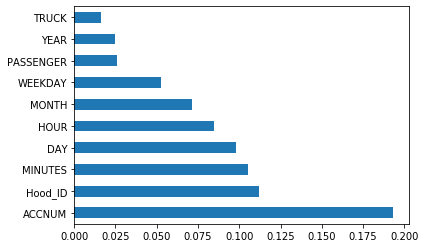

In [92]:
#'ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY','Hood_ID', 'PASSENGER','SPEEDING'
feat_importancesc = pd.Series(RFRc.feature_importances_, index=Xa_train.columns)
feat_importancesc.nlargest(10).plot(kind='barh')

In [93]:
Xa_train.shape

(10763, 54)

In [94]:
Xa_train.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Hood_ID', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'VISIBILITY_Clear', 'VISIBILITY_Drifting Snow',
       'VISIBILITY_Fog, Mist, Smoke, Dust', 'VISIBILITY_Freezing Rain',
       'VISIBILITY_Other', 'VISIBILITY_Rain', 'VISIBILITY_Snow',
       'VISIBILITY_Strong wind', 'RDSFCOND_Dry', 'RDSFCOND_Ice',
       'RDSFCOND_Loose Sand or Gravel', 'RDSFCOND_Loose Snow',
       'RDSFCOND_Other', 'RDSFCOND_Packed Snow', 'RDSFCOND_Slush',
       'RDSFCOND_Spilled liquid', 'RDSFCOND_Wet', 'LIGHT_Dark',
       'LIGHT_Dark, artificial', 'LIGHT_Dawn', 'LIGHT_Dawn, artificial',
       'LIGHT_Daylight', 'LIGHT_Daylight, artificial', 'LIGHT_Dusk',
       'LIGHT_Dusk, artificial', 'LIGHT_Other', 'District_Etobicoke York',
       'District_No District', 'Distric

##### 3.3.6 Raw data modeling selecting Hoodname instead of district for checking whcih hoodname has problems. 173 columns 

In [95]:
KSI_CLEAN_hoodname=KSI_CLEAN[['Hood_Name', 'YEAR', 'MONTH',
        'VISIBILITY','RDSFCOND','LIGHT',
        'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']]

KSI_CLEAN_hoodname = pd.get_dummies(KSI_CLEAN_hoodname, columns=['VISIBILITY','RDSFCOND','LIGHT','Hood_Name'])
KSI_CLEAN_target=KSI_CLEAN[['FATAL']]

Xh_train, Xh_test, y_train,y_test = train_test_split(
    KSI_CLEAN_hoodname, KSI_CLEAN_target,test_size=1/7.0, random_state=1)


RFRh = ske.RandomForestRegressor()
RFRh.fit(Xh_train,y_train)

scorehn = RFRh.score(Xh_train,y_train)
print(scorehn)

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.942961239160123


C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [96]:
KSI_CLEAN_hoodname.shape

(12557, 173)

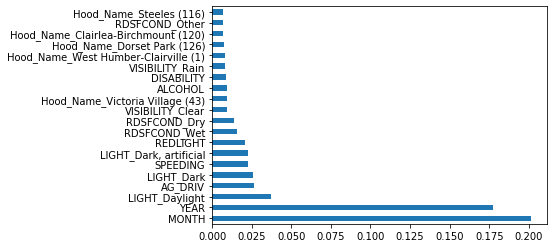

In [97]:
feat_importanceshn = pd.Series(RFRh.feature_importances_, index=Xh_train.columns)
feat_importanceshn.nlargest(20).plot(kind='barh')

In [98]:
KSI_CLEAN_hoodname.columns

Index(['YEAR', 'MONTH', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'VISIBILITY_Clear', 'VISIBILITY_Drifting Snow',
       'VISIBILITY_Fog, Mist, Smoke, Dust',
       ...
       'Hood_Name_Willowdale West (37)',
       'Hood_Name_Willowridge-Martingrove-Richview (7)',
       'Hood_Name_Woburn (137)', 'Hood_Name_Woodbine Corridor (64)',
       'Hood_Name_Woodbine-Lumsden (60)', 'Hood_Name_Wychwood (94)',
       'Hood_Name_Yonge-Eglinton (100)', 'Hood_Name_Yonge-St.Clair (97)',
       'Hood_Name_York University Heights (27)',
       'Hood_Name_Yorkdale-Glen Park (31)'],
      dtype='object', length=173)

Raw data modeling selecting one Hoodname instead of district for checking only hoodname southdale has problems. 32 columns 

'LIGHT_Daylight', 'AG_DRIV', 'LIGHT_Dark, artificial', 'LIGHT_Dark', 'ALCOHOL', 'RDSFCOND_Dry', 'REDLIGHT', 'RDSFCOND_Wet' are condition that need to be improved in South dale area when feature importance was used. Accidnets tend to be more on the dawn time and aggressive driving was the next contribution to fatality in South Parkdale region

In [99]:
KSI_CLEAN_hoodnameSouthdale=KSI_CLEAN[['Hood_Name','YEAR', 'MONTH','VISIBILITY','RDSFCOND','LIGHT','SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL','DISABILITY']]
KSI_CLEAN_hoodnameSouthdale = pd.get_dummies(KSI_CLEAN_hoodnameSouthdale, columns=['Hood_Name'])
KSI_CLEAN_hoodnameSouthdale_columnsname = KSI_CLEAN_hoodnameSouthdale.columns.tolist()


In [100]:
KSI_CLEAN_hoodnameSouthdale=KSI_CLEAN_hoodnameSouthdale[['Hood_Name_South Parkdale (85)','YEAR', 'MONTH','VISIBILITY','RDSFCOND','LIGHT','SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL','DISABILITY']]
KSI_CLEAN_hoodnameSouthdale.columns

Index(['Hood_Name_South Parkdale (85)', 'YEAR', 'MONTH', 'VISIBILITY',
       'RDSFCOND', 'LIGHT', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY'],
      dtype='object')

In [101]:


KSI_CLEAN_hoodnameSouthdale = pd.get_dummies(KSI_CLEAN_hoodnameSouthdale, columns=['VISIBILITY','RDSFCOND','LIGHT'])
KSI_CLEAN_target=KSI_CLEAN[['FATAL']]
Xhsd_train, Xhsd_test, y_train,y_test = train_test_split(
    KSI_CLEAN_hoodnameSouthdale, KSI_CLEAN_target,test_size=1/7.0, random_state=1)


RFRhsd = ske.RandomForestRegressor()
RFRhsd.fit(Xhsd_train,y_train)

scorehnsd = RFRhsd.score(Xhsd_train,y_train)
print(scorehnsd)

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.5389525500810847


C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [102]:
KSI_CLEAN_hoodnameSouthdale.shape

(12557, 34)

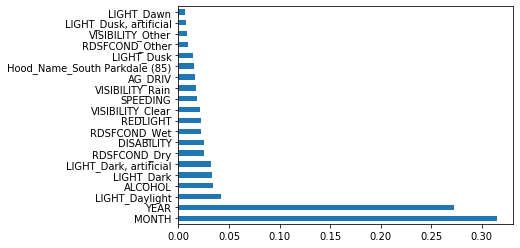

In [103]:
feat_importanceshn = pd.Series(RFRhsd.feature_importances_, index=Xhsd_train.columns)
feat_importanceshn.nlargest(20).plot(kind='barh')

In [104]:
feat_importanceshn.nlargest(10).index

Index(['MONTH', 'YEAR', 'LIGHT_Daylight', 'ALCOHOL', 'LIGHT_Dark',
       'LIGHT_Dark, artificial', 'RDSFCOND_Dry', 'DISABILITY', 'RDSFCOND_Wet',
       'REDLIGHT'],
      dtype='object')

##### 3.3.7 Data model using PCA transform 40 columns from vectors  Xpca_train

In PCA modeling, applying vector theory, 40 vectors from 54 columns were generated for modeling

In [105]:
KSI_CLEAN_data.shape

(12557, 54)

In [106]:

# test_size: what proportion of original data is used for test set
Xpca_train, Xpca_test, ypca_train,ypca_test = train_test_split(
    KSI_CLEAN_data, KSI_CLEAN_target,test_size=1/7.0, random_state=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(Xpca_train)

# Apply transform to both the training set and the test set.
Xpca_train = scaler.transform(Xpca_train)
Xpca_test = scaler.transform(Xpca_test)

In [107]:
from sklearn.decomposition import PCA

In [108]:

pca = PCA(.95)

In [109]:

pca.fit(Xpca_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [110]:

pca.n_components_

40

In [111]:

Xpca_train = pca.transform(Xpca_train)
Xpca_test = pca.transform(Xpca_test)

In [112]:
Xpca_train.shape

(10763, 40)

Measuring Model Performance was evaluated using model scrore. that is accuracy (fraction of correct predictions): correct predictions / total number of data points

Basically, how the model performs on new data (test set)

Performance

Logistic   0.734

decision treee 2  0.035

Random tree forest   0.97


In [113]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(Xpca_train,ypca_train)
logisticRegr.predict(Xpca_test[0].reshape(1,-1))


C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in 

array([0], dtype=int64)

In [114]:
logisticRegr.predict(Xpca_test[0:10])

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [115]:

pca.explained_variance_ratio_

array([0.07050493, 0.04484692, 0.04447539, 0.0397398 , 0.03492146,
       0.03299165, 0.03226269, 0.02914915, 0.02805111, 0.02591   ,
       0.02499195, 0.02346284, 0.02255065, 0.02198565, 0.02156902,
       0.02137348, 0.02107901, 0.02055472, 0.02017477, 0.02009218,
       0.01985134, 0.01970473, 0.01941907, 0.01930816, 0.01926767,
       0.01911637, 0.01883408, 0.01877861, 0.0183347 , 0.01799007,
       0.01752335, 0.0173996 , 0.01728647, 0.01688227, 0.01671043,
       0.01594035, 0.01565951, 0.01468183, 0.01430337, 0.01283434])

In [116]:
pca.explained_variance_ratio_.sum()

0.9505136600619964

In [117]:
score_pcalg = logisticRegr.score(Xpca_train,ypca_train)
print(score_pcalg)

0.8646288209606987


C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [118]:
for i in range(28,38):
    print(logisticRegr.predict(Xpca_train[i].reshape(1,-1)))

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the pre

In [119]:

regr_depth2.fit(Xpca_train,ypca_train)
regr_depth5.fit(Xpca_train,ypca_train)
y_1 = regr_depth2.predict(Xpca_train)
y_2 = regr_depth5.predict(Xpca_train)
score_pcaDT=regr_depth2.score(Xpca_train,ypca_train)

In [120]:
print('Accuracy %d', regr_depth2.score(Xpca_train,ypca_train))

Accuracy %d 0.03541523182075368


In [121]:

print('Accuracy %d', regr_depth5.score(Xpca_train,ypca_train))

Accuracy %d 0.11575236861246528


In [122]:
RFR = ske.RandomForestRegressor()
RFR.fit(Xpca_train,ypca_train)
score_pcaRF=RFR.score(Xpca_train,ypca_train)
RFR.score(Xpca_train,ypca_train)

C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\shanh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; fo

0.9688513764489245

##### 3.3.8 Modeling score comparison




In [123]:
# test_size: what proportion of original data is used for test set
X_new0_train, X_new0_test, y_new0_train,y_new0_test = train_test_split(
    X_new0, KSI_CLEAN_target,test_size=1/7.0, random_state=0)
regr_depth2.fit(X_new0_train,y_new0_train)

score0DT = regr_depth2.score(X_new0_train,y_new0_train)
print(score0DT)

NameError: name 'X_new0' is not defined

In [ ]:
logisticRegrb = LogisticRegression(solver = 'lbfgs')
logisticRegrb.fit(X_new0_train,y_new0_train)

score0LR = logisticRegrb.score(X_new0_train,y_new0_train)
print(score0LR)

In [ ]:
RFR = ske.RandomForestRegressor()
RFR.fit(X_new0_train,y_new0_train)

score0RF = RFR.score(X_new0_train,y_new0_train)
print(score0RF)

In [ ]:
# test_size: what proportion of original data is used for test set
X_new1_train, X_new1_test, y_new1_train,y_new1_test = train_test_split(
    X_new1, KSI_CLEAN_target,test_size=1/7.0, random_state=0)
regr_depth2.fit(X_new1_train,y_new1_train)

score1DT = regr_depth2.score(X_new1_train,y_new1_train)
print(score1DT)

In [ ]:
logisticRegrb = LogisticRegression(solver = 'lbfgs')
logisticRegrb.fit(X_new1_train,y_new1_train)

score1LR = logisticRegrb.score(X_new1_train,y_new1_train)
print(score1LR)

In [ ]:
RFR = ske.RandomForestRegressor()
RFR.fit(X_new1_train,y_new1_train)

score1RF = RFR.score(X_new1_train,y_new1_train)
print(score1RF)

In [ ]:
X_new2_train, X_new2_test, y_new2_train,y_new2_test = train_test_split(
    X_new2, KSI_CLEAN_target,test_size=2/7.0, random_state=0)
regr_depth2.fit(X_new2_train,y_new2_train)

score2DT = regr_depth2.score(X_new2_train,y_new2_train)
print(score2DT)


In [ ]:

logisticRegrb = LogisticRegression(solver = 'lbfgs')
logisticRegrb.fit(X_new2_train,y_new2_train)

score2LR = logisticRegrb.score(X_new2_train,y_new2_train)
print(score2LR)

In [ ]:
RFR = ske.RandomForestRegressor()
RFR.fit(X_new2_train,y_new2_train)

score2RF = RFR.score(X_new2_train,y_new2_train)
print(score2RF)

In [ ]:
X_new_train, X_new_test, y_new_train,y_new_test = train_test_split(
    X_new, KSI_CLEAN_target,test_size=3/7.0, random_state=0)
regr_depth2.fit(X_new_train,y_new_train)

score3DT = regr_depth2.score(X_new_train,y_new_train)
print(score3DT)


In [ ]:

logisticRegrb = LogisticRegression(solver = 'lbfgs')
logisticRegrb.fit(X_new_train,y_new_train)

score3LR = logisticRegrb.score(X_new_train,y_new_train)
print(score3LR)


In [ ]:
RFR = ske.RandomForestRegressor()
RFR.fit(X_new_train,y_new_train)

score3RF = RFR.score(X_new_train,y_new_train)
print(score3RF)


In [ ]:
## data = {'Name':['Tom', 'nick', 'krish', 'jack'],Age':[20, 21, 19, 18]}
Model_Summary={'Raw':[54,scorea,scoreb,scorec],'PCA':[40,score_pcaDT,score_pcalg,score_pcaRF],
               'CSK':[2,score3DT,score3LR,score3RF],'ExtraTrees':[12,score1DT,score1LR,score1RF],
               'LinearSVC':[24,score2DT,score2LR,score2RF],
               'Pvalue0.05':[40,score0DT,score0LR,score0RF],
               'RawHood':[173,'N/A','N/A',0.945],
               'RawHSouth':[34,'N/A','N/A',0.538]
              }
Model_Summary=pd.DataFrame(Model_Summary)
Model_Summary.rename(index={0:'NumbersOfColumns',1:'DecisionTree',2:'Logistic',3:'Randomforest'}, inplace=True)
Model_Summary=Model_Summary.round(3)
Model_Summary

#### 3.3.9 Final modeling

Based on 3.1 cluster analysis, fousing on hood name would be more interesting and 4 clusters were identified by K mean. The next question is how to employ this into our modeling? So here hood name was mapped by 4 clusters based on K mean clusters and would be applied to the modeling with factors that affecting the condition that causing fatal injury. 

'YEAR' and 'MONTH' column would be kept as they contributed greatly to the score of modeling. without them, the score would drop to 0.5. Then columns that affect greatly to score but do not have any practical sense to the business would be dropped, such as 'HOUR', 'MINUTES', 'WEEKDAY', 'PEDESTRIAN', 'AUTOMOBILE', 'TRUCK','TRSN_CITY_VEH', 'PASSENGER'.'Hood_ID' would be replaced by Hood name that would be mapped in 4 clusters(regions).

In [ ]:
KSI_CLEAN_hoodnamemap2=KSI_CLEAN[['Hood_Name', 'YEAR', 'MONTH','DAY',
        'VISIBILITY','RDSFCOND','LIGHT',
        'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY','FATAL']]
KSI_CLEAN_hoodnamemap2['Hood_Name'] = KSI_CLEAN_hoodnamemap2['Hood_Name'].map({'Bendale (127)' :'Cluster4',
         "L'Amoreaux (117)":'Cluster4',  'Clairlea-Birchmount (120)' :'Cluster4','Clanton Park (33)' :'Cluster4',
        'Malvern (132)':'Cluster4','Don Valley Village (47)' :'Cluster4', 'Kensington-Chinatown (78)' :'Cluster4',
'Moss Park (73)':'Cluster4','Newtonbrook West (36)' :'Cluster4',  'Rosedale-Moore Park (98)' :'Cluster4',
"Tam O'Shanter-Sullivan (118)":'Cluster4','Trinity-Bellwoods (81)' :'Cluster4',  'Waterfront Communities-The Island (77)' :'Cluster4',                                                                            
'Woburn (137)':'Cluster4','Yonge-St.Clair (97)' :'Cluster4',
                                                                             
'South Parkdale (85)':'Cluster3','West Humber-Clairville (1)' :'Cluster3',  'Wexford/Maryvale (119)'  :'Cluster3',  
                                                                             
'Agincourt North (129)':'Cluster2','Newtonbrook West (36)' :'Cluster2',  'Rosedale-Moore Park (98)' :'Cluster2',                                                                            
 'Bay Street Corridor (76)':'Cluster2','Agincourt South-Malvern West (128)' :'Cluster2',  'Banbury-Don Mills (42)':'Cluster2',                                                                           
'Bayview Village (52)' :'Cluster2','Bedford Park-Nortown (39)' :'Cluster2',  'Birchcliffe-Cliffside (122)' :'Cluster2', 
'Cabbagetown-South St.James Town (71)':'Cluster2','Caledonia-Fairbank (109)' :'Cluster2',   'Cliffcrest (123)' :'Cluster2',
                                                                             
'Corso Italia-Davenport (92)':'Cluster2','Danforth East York (59)' :'Cluster2',  'Dorset Park (126)' :'Cluster2',
 'Dovercourt-Wallace Emerson-Junction (93)':'Cluster2', 'Downsview-Roding-CFB (26)':'Cluster2',  'Eglinton East (138)' :'Cluster2',
                                                                             
'Flemingdon Park (44)':'Cluster2', 'High Park-Swansea (87)':'Cluster2',   'Humber Heights-Westmount (8)':'Cluster2',
'Humber Summit (21)':'Cluster2',  'Humbermede (22)':'Cluster2',  'Ionview (125)':'Cluster2',                                                                           
'Islington-City Centre West (14)' :'Cluster2', 'Kennedy Park (124)':'Cluster2',   'Lawrence Park South (103)' :'Cluster2',
 'Lawrence Park South (103)':'Cluster2',                                                                          
 'Newtonbrook East (50)':'Cluster2',  'Little Portugal (84)':'Cluster2',   'The Beaches (63)':'Cluster2',                                                                               
 'Rexdale-Kipling (4)':'Cluster2',    'Milliken (130)':'Cluster2',                                                                               
 'Roncesvalles (86)':'Cluster2','Rockcliffe-Smythe (111)' :'Cluster2',                                                                                
 'Rouge (131)':'Cluster2', 'Scarborough Village (139)':'Cluster2',   'South Riverdale (70)':'Cluster2',  
 'Steeles (116)':'Cluster2',   'Willowdale East (51)':'Cluster2', 'Westminster-Branson (35)' :'Cluster2',                                                                               
'York University Heights (27)':'Cluster2',                                                                              

                                                                             
'Alderwood (20)' :'Cluster1', 'Annex (95)':'Cluster1',  'Bathurst Manor (34)'  :'Cluster1',                                                                              
'Black Creek (24)' :'Cluster1', 'Broadview North (57)':'Cluster1',   'Brookhaven-Amesbury (30)':'Cluster1',                                                                                
'Casa Loma (96)' :'Cluster1', 'Centennial Scarborough (133)':'Cluster1',   'Church-Yonge Corridor (75)':'Cluster1',                                                                              
 'Dufferin Grove (83)':'Cluster1', 'Edenbridge-Humber Valley (9)':'Cluster1','Elms-Old Rexdale (5)':'Cluster1',                                                                             
 'Englemount-Lawrence (32)':'Cluster1',  'Forest Hill South (101)':'Cluster1',   'Glenfield-Jane Heights (25)' :'Cluster1', 
'Greenwood-Coxwell (65)':'Cluster1', 'Henry Farm (53)':'Cluster1',   'High Park North (88)':'Cluster1',                                                                              
'Highland Creek (134)' :'Cluster1', 'Hillcrest Village (48)':'Cluster1',  'Humewood-Cedarvale (106)' :'Cluster1',                                                                              
 'Junction Area (90)':'Cluster1', 'Keelesdale-Eglinton West (110)':'Cluster1',                                                                               
 'Lansing-Westgate (38)' :'Cluster1', 'Leaside-Bennington (56)' :'Cluster1',   'Lawrence Park North (105)':'Cluster1',                                                                             
 'Long Branch (19)':'Cluster1', 'Maple Leaf (29)':'Cluster1',  'Markland Wood (12)' :'Cluster1',                                                                             
 'Mimico (includes Humber Bay Shores) (17)':'Cluster1', 'Morningside (135)' :'Cluster1',  'Mount Dennis (115)':'Cluster1',                                                                             
'Mount Olive-Silverstone-Jamestown (2)':'Cluster1',  'New Toronto (18)' :'Cluster1',   'North Riverdale (68)':'Cluster1', 
'North St.James Town (74)':'Cluster1', 'Oakwood Village (107)':'Cluster1',   'Old East York (58)':'Cluster1',                                                                              
 "O'Connor-Parkview (54)":'Cluster1', 'Pleasant View (46)' :'Cluster1',  'Parkwoods-Donalda (45)' :'Cluster1',                                                                             
 'Regent Park (72)':'Cluster1', 'Rustic (28)' :'Cluster1',   'St.Andrew-Windfields (40)':'Cluster1',                                                                             
  'Thistletown-Beaumond Heights (3)' :'Cluster1', 'University (79)':'Cluster1',  'Victoria Village (43)' :'Cluster1',                                                                             
 'Victoria Village (43)':'Cluster1', 'West Hill (136)' :'Cluster1',   'Weston (113)' :'Cluster1', 
 'Weston-Pellam Park (91)':'Cluster1',  'Willowdale West (37)':'Cluster1',   'Willowridge-Martingrove-Richview (7)' :'Cluster1', 
  'Yonge-Eglinton (100)' :'Cluster1'     })

KSI_CLEAN_hoodnamemap1=KSI_CLEAN_hoodnamemap2[['Hood_Name', 'YEAR', 'MONTH',
        'VISIBILITY','RDSFCOND','LIGHT',
        'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']]
KSI_CLEAN_hoodnamemap1['Hood_Name'].nunique()                                                                            
                                                        

In [ ]:
KSI_CLEAN_hoodnamemap= pd.get_dummies(KSI_CLEAN_hoodnamemap1, columns=['VISIBILITY','RDSFCOND','LIGHT','Hood_Name'])
KSI_CLEAN_target=KSI_CLEAN[['FATAL']]

Xhm_train, Xhm_test, y_train,y_test = train_test_split(
    KSI_CLEAN_hoodnamemap, KSI_CLEAN_target,test_size=1/7.0, random_state=1)


RFRhm = ske.RandomForestRegressor()
RFRhm.fit(Xhm_train,y_train)

scorehm = RFRhm.score(Xhm_train,y_train)
print(scorehm)

In [ ]:
KSI_CLEAN_hoodnamemap.columns

In [ ]:
feat_importanceshnmap = pd.Series(RFRhm.feature_importances_, index=Xhm_train.columns)
feat_importanceshnmap.nlargest(17).plot(kind='barh')


In [ ]:
KSI_CLEAN_hoodnamemap3=KSI_CLEAN_hoodnamemap2[['Hood_Name', 'VISIBILITY', 'RDSFCOND', 'LIGHT',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'FATAL','YEAR', 'MONTH','DAY']]
KSI_CLEAN_hoodnamemap3= pd.get_dummies(KSI_CLEAN_hoodnamemap3, columns=['VISIBILITY','RDSFCOND','LIGHT'])
KSI_CLEAN_hoodnamemap3.columns

In [ ]:
analysis=['FATAL','SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 
        'YEAR', 'MONTH','VISIBILITY_Freezing Rain',
        'VISIBILITY_Rain', 'VISIBILITY_Snow',
        'RDSFCOND_Wet', 'LIGHT_Dark',
        'LIGHT_Dawn', 
       'LIGHT_Daylight',  'LIGHT_Dusk',
       ]


In [ ]:
KSI_CLEAN_hoodnamemap3.dtypes

In [ ]:
clusteranalysis_hoodnamemap=KSI_CLEAN_hoodnamemap3.groupby('Hood_Name').mean()
clusteranalysis_hoodnamemap[analysis]

In [ ]:
clusteranalysis_hoodnamemap1=KSI_CLEAN_hoodnamemap3[KSI_CLEAN_hoodnamemap3['FATAL']==1]

clusteranalysis_hoodnamemap1=clusteranalysis_hoodnamemap1.groupby('Hood_Name').mean()
clusteranalysis_hoodnamemap1[analysis]

From groupby clause and feature importance, cluster 3 presented highest numbers in fatal injury and its dark light, red light and freezing rain was slightly higher than other clusters. Besides most of the fatal injury in cluster 3 seems to happening earilier than 2011 and focused more on months before July. 

But when further analysis was carried out to only selecting 'FATAL' = 1, that is to say in those fatal injury what is going to change in those numbers. From the next groupby table, it seems that aggressive driving and speeding contribute a lot to accidents lead to fatal injury in cluster 1 though the actual number or accident rate is lower than other region. But dark light in cluster 3 presented higher units among others and it is true that cluster 3 has the most fatal injury reported.

To finish this section, cluster 3 was found to be more fatal injury and it was largely related to dark light condition in that region. Cluster 1 had the lowest numbers of fatal injury reported but its aggressive driving and speeding tend to be higher compared to other regions or clusters. So the relative safer zone was cluster 4 and then cluster 2 region.

### 4.0 Conclusion and future work

In this modeling, several graph was used to explore relations inside the dataset. Column 'FATAL' was chozen as target output as it did not has missing value and in numeric format.In region-wise, Toronto east region was reported to be the most accidents ending up with fatal injury as showed in 2.4 section. Automobiles have been pretty consistent reason of accident over the years involving aggressive driving and pedestrians. AG_DRIV (Aggressive and Distracted Driving) are the major cause of accidents (62.9%), speeding accounts for 21.4%, redlight is 10.4% and alcohol is 5.3 % based on 2.5 section. 

Then feature selection and cluster analysis was employed to reduce dimension and optimized for best modeling score. From feature selection, column like accnum, year, month, hoodID or name, weekday, minute and hour has great impact to modeling score and relation to fatal injury. But accnum, minute and hour did not has a lot business sense in real situation and in this modeling, thus was not selecting for final modeling. From elbow cluster method, 4 clusters was used to map the hoodname for final modeling to present which region result in more fatal injury and what is the cause behind it. In general, the results are not very significant that can demonstrate big reveral of the cause. But relative safer zone or dangerous area can be identified. Dark light, red light and freezing rain was found at slightly higher in the dangerous area that causing 0.05 unit more fatal injury than other areas. Those dangerous area are South parkdale, West humber-clairville and Wexford/Maryvale. Hood name in Cluster 4 and 2 was found to be relative safer zone in fatal injury.

Regarding modeling-wise, pca was the best among all modeling for dimension reducing and modeling score but its drawback was obvious that it can't tell right away difference and that indicating real facotrs. It has to be done with PCA ratios in order to find out contribution for each features. Among all modeling and feature selection, 'Year' and 'Month' column greatly impact th modeling score. Column accident number, though not presenting real indication of fatal injury, plays a important role in affecting scores. So those year and month column were kept for modeling. Only selecting hoodname and other condition related column yield modeling score under or around 0.5 which will greatly impact our prediction for fatal injury. Selecting the final modeling with score 0.74 was the compromise between those factors. Finding a balance between real business model and theoretical prediction modeling was very interesting and sometimes complicated. 

In general, aggressive driving and speeding contribute greatly to fatal injury. But in dangerous neighborhood, dark light was found be to causing issues compared to other regions. 

For future work, if more numeric data was reported based on different condition, that will help us to understand the real business model. Ages for driver invloed in fatal injury was missed in the dataset that may replace the impact of accunum column and improve the modeling score. 

Great thanks!









